## Project: Data Wrangling using Pandas and Regex

In this project you are asked __to implement__ and __perform a unit testing__ for a series of Python functions (Q1-Q13) that are typically required during the ***data wrangling*** phase of the end-to-end data science pipeline. A subset of unit testing functions is provided for you. You are expected to write unit testing for all the remaining functions.

__Data Wrangling consists of the following main steps:__

* Data Acquisition
* Data Cleansing
* Data Understanding: Basics
* Data Manipulation
  
  
__1. Data Acquisition Objectives__

* Question 1: How to import multiples files for storage and access? (store filenames in array)
* Question 2: How to import data in different formats? (read_excel, read_csv)
* Question 2: How are they read into by pandas? (DataFrame)
* Question 4: How to have a peek at the data after import? (head/tail)

__2. Data Cleansing Objectives__

* Question 5: Check attributes of each file
* Question 5: Identify data types
* Question 5: Apply coercion if applicable
* Question 5: Check for NA/missing data
* Question 6: Remove/replace corrupt data
* Question 6: Identify duplicate data
* Question 6: Check for corrupt/incorrect data  

* Check for data consistency (e.g. GPA cannot be less than 0)
* Identifying and removing outliers

__3. Data Understanding Objectives__

* Question 7: Basic Summary Statistics
* Question 9: Dimensionality

__4. Data Manipulation Objectives__

* Question 11: Merge/Concatenate DataFrame
* Question 11: Mapping to create a new attribute
* Question 11: Incorporate the use of multiple functions
* Question 12: Filter to subset the data
* Question 13: Discretize data 
  
  
__Regular Expressions:__ *Regular expressions are used in conjunction with other preprocessing steps for matching/parsing patterns.*

* Questions 2/5/6: Filter to subset the dataUse regular expressions to find/match specific content
* Question 6: Filter to subset the dataString manipulation via. substring and replace methods

## Install Required Packages

If you do not have Anaconda installed, then you may need to install the following packages using the following commands (Note: If you have Anaconda installed, then you already have Pandas and `regex`):

> pip3 install pandas  
  
> pip3 install regex

## INSTRUCTIONS: In all the functions, remove the `pass` statement and write your code.

In [1]:
import pandas as pd
import re
import glob
import copy

%matplotlib inline
import matplotlib.pyplot as plt

### __Question 1: Write a function to import all excel file names into a list.__

_Hint: Use the glob module._

In [2]:
def Q1_function():
    """
    :type : None
    :rtype: List[String]
    """
    # TYPE YOUR CODE HERE
#     excel_files = []
    excel_files = glob.glob('./*/*.xlsx')
#     print(len(excel_files))
    return excel_files
    
    


# Call the function and print the result. This result is used in subsequent questions.
filenames = Q1_function()
print(filenames)

['.\\data_raw\\Python-QUIZ Coercion (6 min.)-grades.xlsx', '.\\data_raw\\Python-QUIZ Conditionals (6 min.)-grades.xlsx', '.\\data_raw\\Python-QUIZ Dictionaries (10 min.)-grades.xlsx', '.\\data_raw\\Python-QUIZ Exceptions (10 min.)-grades.xlsx', '.\\data_raw\\Python-QUIZ Functions (18 min.)-grades.xlsx', '.\\data_raw\\Python-QUIZ Iterations (6 min.)-grades.xlsx', '.\\data_raw\\Python-QUIZ Lists (10 min.)-grades.xlsx', '.\\data_raw\\Python-QUIZ Sets (7 min)-grades.xlsx', '.\\data_raw\\Python-QUIZ Strings (5 min.)-grades.xlsx', '.\\data_raw\\Python-QUIZ Taxonomy of Python Data Structures (12 min.)-grades.xlsx', '.\\data_raw\\Python-QUIZ Tuples (10 min.)-grades.xlsx']


### __Question 2: Write a function to return the name of the excel file based on a given string. *(The string is defined for you)*__  
*Hints: Use the following.*
* Regex 're.search' function.
* Pandas function 'read_excel'

In [3]:
def Q2_function(files, s):
    """
    :type : List[String], String
    :rtype: String
    """
    # TYPE YOUR CODE HERE
    
    for file in files:
        matched_filenames = re.search(s,file)
        if matched_filenames:
            return file
        

# Call the function and print the result. Use this to check the correctness of your code and for debugging.
file = Q2_function(filenames, s = "Dictionaries")
print(file)

.\data_raw\Python-QUIZ Dictionaries (10 min.)-grades.xlsx


### __Question 3: Write a function to load the "Functions" excel file into a Pandas DataFrame.__  
*Hint: Remember you have executed functions in Questions 1 and 2. Try using them here. You can save some coding time!*  
* Use the result from Question 1.
* Use the function written in Question 2.
* Use the Pandas function 'read_excel' to import an excel file.

In [4]:
def Q3_function(files, s):
    """
    :type : List[String], String
    :rtype: Pandas DataFrame
    """
    # TYPE YOUR CODE HERE
    file = Q2_function(files,s)
#     print(file)
    df = pd.read_excel(file,index_col = 0)
    return df
    


# Call the function and print the result. This result is used in subsequent questions.
functions_df = Q3_function(filenames, s = "Functions")
# print(functions_df)
functions_df.head(3)

,State,Started on,Completed,Time taken,Grade/45.00,Q. 1 /5.00,Q. 2 /10.00,Q. 3 /6.00,Q. 4 /6.00,Q. 5 /12.00,Q. 6 /6.00,id
0,Finished,February 5 2018 3:19 PM,February 5 2018 3:34 PM,14 mins 16 secs,32,5,6,6,3.00,12.00,0.00,0
1,Finished,February 4 2018 4:01 PM,February 4 2018 4:19 PM,17 mins 54 secs,31,5,8,6,-,12.00,0.00,1
12,Finished,February 6 2018 3:57 PM,February 6 2018 4:12 PM,15 mins 44 secs,20,3,4,3,-,10.00,0.00,12


### __Question 4: Using the output obtained in Question 3 as input for the current question, write a function to do the following.__  
* Find all the names of the columns and return as a list.
* Find the subset of the DataFrame (use `df.loc`) and return the new DataFrame. Include the following columns:   
_"id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"_
* Return the top 10 rows (use `df.head function`).

Learn about returning multiple values in Python.

In [5]:
def Q4_function(dataframe):
    """
    :type : DataFrame
    :rtype: [String], DataFrame, DataFrame
    """
    # TYPE YOUR CODE HERE
    
    col_names = list(dataframe.columns.values)
#     print(col_names)
    subset_new_df = dataframe.loc[:,["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]]
    top_10_rows = subset_new_df.head(10)
    return col_names,subset_new_df,top_10_rows

# Call the function and print the results. These results are used in subsequent questions.
names, df_subset, top_10 = Q4_function(functions_df)

print("Column Names")
print(names)
print()
print("Subsetted Data")
print(df_subset)
print()
print("Top 10 Rows")
print(top_10)

Column Names
['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00', 'id']

Subsetted Data
    id       Time taken  Grade/45.00  Q. 1 /5.00  Q. 2 /10.00  Q. 3 /6.00  \
0    0  14 mins 16 secs           32           5            6           6   
1    1  17 mins 54 secs           31           5            8           6   
12  12  15 mins 44 secs           20           3            4           3   
2    2          18 mins           30           5            6           6   
3    3  17 mins 31 secs           26           5            6           6   
4    4  17 mins 59 secs           25           5            6           6   
5    5          18 mins           24           5            6           6   
6    6          18 mins           23           5            6           0   
7    7    18 mins 1 sec           23           4            4           6   
8    8  16 mins 44 secs           22       

### Question 5: Using the subsetted DataFrame from the previous question, complete the following tasks.

* Identify the data type of every column. Return as a list. *(read about dtypes)*
* Strip all white spaces from the columns. 
    + try using list comprehension along with the 'sub' function in 're' module
* Check if 'Time taken' column has NA or empty values:
    + use `df.isnull().any()`. 
    + If YES, replace with 0: use `df.fillna()`.
* Using `regex` (`re.search`), convert the 'Time taken' column into seconds (int) and store in a new column called 'time' (e.g., convert __2 mins 10 secs__ into __130__. Note that to get 130, you need to do some math. Use coersion to convert str to int.
* Return the DataFrame with 'Time taken' column dropped.

In [7]:
def Q5_function(df):
    
    """
    :type : DataFrame
    :rtype: [String], DataFrame
    """
    # TYPE YOUR CODE HERE
    
    df_new = copy.deepcopy(df)                                               #making a copy of the dataframe 
    column_datatype = df_new.dtypes                                          #finding datatypes of each column
    df_new.columns = [re.sub(" ","",x) for x in df_new.columns.values]       #removing white spaces from column names
    if df_new.loc[:,'Timetaken'].isnull().any():                             #check if the TimeTaken column has any null values if yes then replace with 0
        df_new.loc[:,'Timetaken'].fillna(0,inplace=True)
    
    for index, data in df_new['Timetaken'].iteritems():
        minutes = re.search('\d+(?= min*)',data)                             #extract minutes and see if it exists or not, if exists covert to int else place 0
        if minutes:
            minutes = int(minutes.group(0))
        else:
            minutes = 0

        seconds = re.search('\d+(?= sec*)',data)                             #extract seconds and see if it exists or not, if exists covert to int else place 0
        if seconds:
            seconds = int(seconds.group(0))
        else:
            seconds = 0
        
        df_new.set_value(index,'Time',minutes*60+seconds)                    #converting minutes and secs time format to secs format
    
    df_new.drop(labels = 'Timetaken', axis=1,inplace = True)                 #removing Timetaken Column
    
    return column_datatype, df_new

# Call the function and print the results. These results are used in subsequent questions.
column_types, Q5_df = Q5_function(df_subset)
print("Column Datatypes")
print(column_types)
print()
print("New Update DataFrame")
print(Q5_df)

Column Datatypes
id              int64
Time taken     object
Grade/45.00     int64
Q. 1 /5.00      int64
Q. 2 /10.00     int64
Q. 3 /6.00      int64
Q. 4 /6.00     object
Q. 5 /12.00    object
Q. 6 /6.00     object
dtype: object

New Update DataFrame
    id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00 Q.4/6.00 Q.5/12.00  \
0    0           32         5          6         6     3.00     12.00   
1    1           31         5          8         6        -     12.00   
12  12           20         3          4         3        -     10.00   
2    2           30         5          6         6     3.00     10.00   
3    3           26         5          6         6     3.00      6.00   
4    4           25         5          6         6     6.00      2.00   
5    5           24         5          6         6     3.00      4.00   
6    6           23         5          6         0     0.00      6.00   
7    7           23         4          4         6     3.00      6.00   
8    8           22

C:\Users\vishw\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


### Question 6: Using the returned DataFrame from the previous question, complete the following tasks.

* Some columns might need to be converted to integer for the subsequent tasks. Identify which columns and convert them to int/float.
* Are there any duplicate rows? Remove them from the DataFrame.
* Data collected might be corrupt. Check whether data is missing or corrupt. Data is missing if there is a '-'. If missing data exists, replace with the mean of other values.
* With the above point in mind, find the mean values of all columns except 'id'. Append these as a row to your dataframe and return

*Hint: Note that the maximum marks for each column is different. Make sure you parse the information from the column name.*

In [17]:
def Q6_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """
    # TYPE YOUR CODE HERE
    df_new = copy.deepcopy(df)
    df_new.drop_duplicates(subset = None,keep = 'first', inplace=True)
    df_new.sort_values(by=['id'], ascending=True, inplace=True)
    
    values = ["Average"]
#     print(df.mean())
#     print(df_new)
    
    for col in df_new:
        if col in ['id']:
            pass
        else:
            mean = 0
            count = 0
            for value in df_new[col].values:
                if value!='-':
                    mean = mean+float(value)
                    count = count+1
                else:
                    mean = mean+0
            mean = mean/count
            df_new[col].replace('-', mean,inplace=True)
            df_new[col] = df_new[col].apply(pd.to_numeric)
            mean = df_new[col].mean(axis=0, skipna=True)
#             df[col].replace('-', mean,inplace=True)
            values.append(mean)
        
    return df_new.append(pd.Series(values, index=df_new.columns.values), ignore_index=True)

# Call the function and print the results.
Q6_df = Q6_function(Q5_df)
print(Q6_df)

         id  Grade/45.00  Q.1/5.00  Q.2/10.00  Q.3/6.00  Q.4/6.00  Q.5/12.00  \
0         0    32.000000  5.000000   6.000000  6.000000       3.0  12.000000   
1         1    31.000000  5.000000   8.000000  6.000000       2.0  12.000000   
2         2    30.000000  5.000000   6.000000  6.000000       3.0  10.000000   
3         3    26.000000  5.000000   6.000000  6.000000       3.0   6.000000   
4         4    25.000000  5.000000   6.000000  6.000000       6.0   2.000000   
5         5    24.000000  5.000000   6.000000  6.000000       3.0   4.000000   
6         6    23.000000  5.000000   6.000000  0.000000       0.0   6.000000   
7         7    23.000000  4.000000   4.000000  6.000000       3.0   6.000000   
8         8    22.000000  4.000000   4.000000  6.000000       0.0   8.000000   
9         9    22.000000  5.000000   8.000000  6.000000       3.0   0.000000   
10       10    21.000000  5.000000  10.000000  6.000000       2.0   0.000000   
11       11    21.000000  4.000000   4.0

### Question 7: Use previously created functions to load the 'Exceptions' dataset as a dataframe

* Calculate the mean of the total grade obtained by the students.
* Calculate the standard deviation of the total grade obtained by the students.
* Calculate Q1,Q2 and Q3 (quantiles) for the total grade.
* Find the maximum and minimum values for the total grade

* Return all values rounded to 2 decimal places

*Hint: Use the df.describe function*

In [18]:
def Q7_function(file):
    """
    :type : String
    :rtype: Float
    """
    # TYPE YOUR CODE HERE
    
    df_exceptions = Q3_function(filenames,file)
    df = df_exceptions.describe()['Grade/21.00'].round(2)
    
    return df['mean'],df['std'],df['25%'],df['50%'],df['75%'],df['max'],df['min']

# Call the function and print the results.
mean_,std_,q1,q2,q3,max_,min_ = Q7_function(file="Exceptions")
print("Mean:", mean_)
print("Std. Dev.:", std_)
print("First Quantile", q1)
print("Second Quantile", q2)
print("Third Quantile", q3)
print("Max:", max_)
print("Min:", min_)

Mean: 14.83
Std. Dev.: 2.19
First Quantile 13.46
Second Quantile 14.66
Third Quantile 16.62
Max: 18.5
Min: 10.83


### Question 8: Create a boxplot of the grade distribution in the 'Exceptions' dataset.

* Compare the plot lines to the values calculated in the previous question.
* Use df.plot.box function.

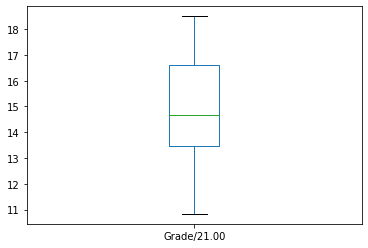

In [19]:
def Q8_function(file):
    
    """
    :type : String
    :rtype: Plot
    """
    
    df = Q3_function(filenames, file)
    Q8_plot = df[['Grade/21.00']].plot.box(return_type='axes')
    
    return Q8_plot


# Call the function. Plot will display.
Q8_function(file='Exceptions')

### Question 9: Return the number of rows and columns present in the 'Strings' dataset

* Use the `df.shape` attribute.

In [20]:
def Q9_function(file):
    
    """
    :type : String
    :rtype: list
    """ 
    # TYPE YOUR CODE HERE
    
    df = Q3_function(filenames,file)
    return list(df.shape)


# Call the function and print the results
rows, columns = Q9_function (file='Strings')
print("Rows:",rows)
print("Columns:",columns)

Rows: 17
Columns: 7


### Question 10: Use the output from Question 5. Group the students based on their score in 'Q. 5 /12.00' column

* Which students scored 0 
* How many students achieved the maximum possible score
* Consider NA/missing values as 0

*Hint : Use groupby function.*


In [21]:
def Q10_function(df):
    
    """
    :type : DataFrame
    :rtype: list, int
    """ 
    # TYPE YOUR CODE HERE
#     print(df)
    df['Q.5/12.00'].replace('-', 0,inplace=True)
    df['Q.5/12.00'] = df['Q.5/12.00'].apply(pd.to_numeric)
    
    scores = df.groupby('Q.5/12.00').id.unique()
    return scores[min(df['Q.5/12.00'])],len(scores[max(df['Q.5/12.00'])])


# Call the function and print the results
zero, maximum = Q10_function(Q5_df)
print("Students scoring zero :",zero)
print("Number of students with maximum score :",maximum)

Students scoring zero : [ 9 10 13 17 18]
Number of students with maximum score : 2


### Question 11: Find out who ('id') has scored the maximum combined score in the 'Tuples' and 'Taxonomy' quiz.

* Use the `pd.merge()` function.
* Call the function you wrote for Question 5 to convert time and remove spaces in columns (will be used in later questions).
* Create a new column 'Total_score' which is the sum of the scores of the two quizzes.

In [22]:
def Q11_function():
    
    """
    :type : None
    :rtype: Dataframe, int
    """ 
    # TYPE YOUR CODE HERE
    
    df_taxonomy = Q3_function(filenames, s = "Taxonomy")
    
    df_tuples = Q3_function(filenames, s = "Tuples")

    taxo_col_type,taxo_df = Q5_function(df_taxonomy)
    tup_col_type,tup_df = Q5_function(df_tuples)
    
    merged_df = pd.merge(taxo_df,tup_df,on="id",how="inner")
    merged_df['Total_score'] = merged_df['Grade/20.00']+merged_df['Grade/21.00']
    
    return merged_df,merged_df.set_index(['id'])['Total_score'].idxmax()

# Call the function and print the results. The DataFrame will be used in subsequent questions
Q11_df,max_scorer = Q11_function()
print("Max scorer :",max_scorer)

Max scorer : 10


C:\Users\vishw\Anaconda3\lib\site-packages\ipykernel_launcher.py:28: FutureWarning: set_value is deprecated and will be removed in a future release. Please use .at[] or .iat[] accessors instead


### Question 12: Use the DataFrame generated in Question 11 and return the list of ids whose total time for both quizzes is less than than 20 minutes.

* Sort the list before returning.
* Can you code it in one line?

In [23]:
def Q12_function(df):
    
    """
    :type : DataFrame
    :rtype: list(int)
    """ 
    # TYPE YOUR CODE HERE
#     print(df)
    
    return sorted(list(df[df['Time_x'] + df['Time_y']<(20*60)]['id']))


# Call the function and print the results.
ids = Q12_function(Q11_df)
print("ID of students :",ids)

ID of students : [3, 4, 7, 8, 12, 18]


### Question 13: Discretize the column 'Grade/45.00' for the DataFrame generated in Question 6 and create a new column. Find the number of people (id) per bin. Return a DataFrame with only the bins and count per bin.

*Hints:* 
* _Use 'cut' and 'groupby'._
* _You won't need to use 'drop' to drop columns. Use groupby and check the result._
* _Use 5 bins_
* _Don't consider 'Overall Average' row._

In [15]:
def Q13_function(df):
    
    """
    :type : DataFrame
    :rtype: DataFrame
    """    
    # TYPE YOUR CODE HERE
    new_df = pd.DataFrame()
    df['Bins'] = pd.cut(df['Grade/45.00'],5)
#     print(df['count'])
    new_df['Bins'] = df['Bins'][:-1]
    new_df['id'] = df['id'][:-1]
#     print(new_df)
    new_df = new_df.groupby('Bins')["id"].count().reset_index(name="count")
#     df['Bins'] = df['Bins'].apply(pd.to_numeric)
#     print(df.columns)
#     print(df['Bins'])
#     print(new_df['count'])
    
    return new_df


# Call the function and print the results.
Q13_df = Q13_function(Q6_df)
print(Q13_df)

             Bins  count
0  (12.981, 16.8]      4
1    (16.8, 20.6]      3
2    (20.6, 24.4]      7
3    (24.4, 28.2]      2
4    (28.2, 32.0]      3


### INSTRUCTIONS: Complete unit testing for the remaining functions to check correctness of your code.

In [16]:
import unittest

class TestNotebook(unittest.TestCase):


    def test_Q02_function(self):
        
        ans='Python-QUIZ Lists (10 min.)-grades.xlsx'
        
        result=Q2_function(filenames, s = "Lists")
        
        #Handling removal of the path to check only filename
        self.assertEqual(ans,result.split("/")[-1].split("\\")[-1])

        
    def test_Q04_function(self):
        
        cols_ans=['State', 'Started on', 'Completed', 'Time taken', 'Grade/45.00', 'Q. 1 /5.00', 'Q. 2 /10.00', 'Q. 3 /6.00', 'Q. 4 /6.00', 'Q. 5 /12.00', 'Q. 6 /6.00',  'id']
        subset_cols_ans= ["id", "Time taken", "Grade/45.00", "Q. 1 /5.00", "Q. 2 /10.00", "Q. 3 /6.00", "Q. 4 /6.00", "Q. 5 /12.00", "Q. 6 /6.00"]
        top_ans=10
        
        cols_result,subset_result,top_result=Q4_function(functions_df)

        self.assertEqual(cols_ans,list(cols_result))
        self.assertEqual(subset_cols_ans,list(subset_result.columns))
        self.assertEqual(top_ans,len(top_result))
        
        
    def test_Q07_function(self):
        
        ans=(14.83,2.19,13.46,14.66,16.62,18.5,10.83) 
        result=Q7_function(file="Exceptions")
        self.assertEqual(ans, result)

        
    def test_Q12_function(self):
        ans=[3, 4, 7, 8, 12, 18]   
        result=Q12_function(Q11_df)
        self.assertEqual(ans, result)
        
    def test_Q13_function(self):
        ans = [[15, 16, 17, 18], [12, 13, 14], [5, 6, 7, 8, 9, 10, 11], [3, 4], [0, 1, 2]]
        temp = Q13_function(Q6_df)
        result = temp['count'].tolist()
        
        for x in range(len(ans)):
            self.assertEqual(result[x], len(ans[x]))

        
unittest.main(argv=[''], verbosity=2, exit=False)

test_Q02_function (__main__.TestNotebook) ... ok
test_Q04_function (__main__.TestNotebook) ... ok
test_Q07_function (__main__.TestNotebook) ... C:\Users\vishw\Anaconda3\lib\site-packages\xlrd\xlsx.py:266: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
C:\Users\vishw\Anaconda3\lib\site-packages\xlrd\xlsx.py:312: PendingDeprecationWarning: This method will be removed in future versions.  Use 'tree.iter()' or 'list(tree.iter())' instead.
  for elem in self.tree.iter() if Element_has_iter else self.tree.getiterator():
ok
test_Q12_function (__main__.TestNotebook) ... ok
test_Q13_function (__main__.TestNotebook) ... ok

----------------------------------------------------------------------
Ran 5 tests in 0.042s

OK
